### Game of Thrones datasets from https://www.kaggle.com/mylesoneill/game-of-thrones

### Exploratory Analysis

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data_predictions = pd.read_csv('character-predictions.csv')
data_deaths = pd.read_csv('character-deaths.csv')
data_battles = pd.read_csv('battles.csv')

### Common analysis

In [3]:
print data_predictions.columns
data_predictions.head()

Index([u'S.No', u'actual', u'pred', u'alive', u'plod', u'name', u'title',
       u'male', u'culture', u'dateOfBirth', u'DateoFdeath', u'mother',
       u'father', u'heir', u'house', u'spouse', u'book1', u'book2', u'book3',
       u'book4', u'book5', u'isAliveMother', u'isAliveFather', u'isAliveHeir',
       u'isAliveSpouse', u'isMarried', u'isNoble', u'age', u'numDeadRelations',
       u'boolDeadRelations', u'isPopular', u'popularity', u'isAlive'],
      dtype='object')


,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [4]:
print data_deaths.columns
data_deaths.head()

Index([u'Name', u'Allegiances', u'Death Year', u'Book of Death',
       u'Death Chapter', u'Book Intro Chapter', u'Gender', u'Nobility', u'GoT',
       u'CoK', u'SoS', u'FfC', u'DwD'],
      dtype='object')


,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [5]:
print data_battles.columns
data_battles.head()

Index([u'name', u'year', u'battle_number', u'attacker_king', u'defender_king',
       u'attacker_1', u'attacker_2', u'attacker_3', u'attacker_4',
       u'defender_1', u'defender_2', u'defender_3', u'defender_4',
       u'attacker_outcome', u'battle_type', u'major_death', u'major_capture',
       u'attacker_size', u'defender_size', u'attacker_commander',
       u'defender_commander', u'summer', u'location', u'region', u'note'],
      dtype='object')


,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


### How much heroes in each books?

### Young characters more popular?

Series([], Name: age, dtype: float64)
average age = 36.7852193995


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


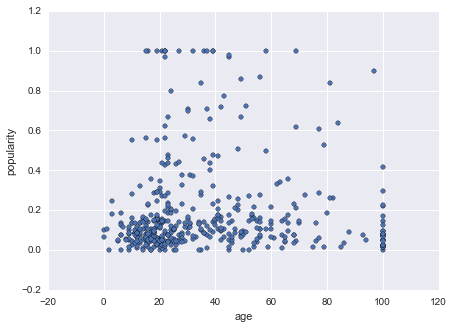

In [6]:
import copy
data_predictions['age'].fillna(0)
data_predictions.loc[data_predictions['age'] < 0, 'age'] = 30
print data_predictions.loc[data_predictions['age'] < 0, 'age']
data_predictions.plot(kind="scatter", x="age", y="popularity", figsize = (7,5))
print "average age = {}".format(data_predictions['age'].mean())

### How much male and female?

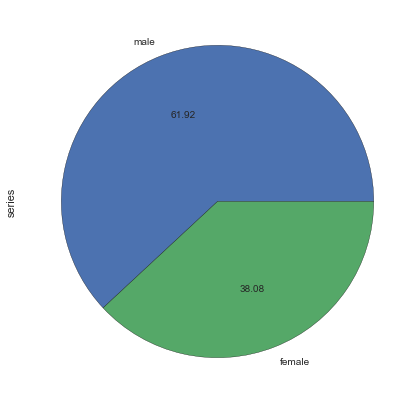

In [7]:
series_male_female = pd.Series([data_predictions.ix[data_predictions['male'] == 1, 'male'].count(), data_predictions.ix[data_predictions['male'] == 0, 'male'].count()], index=['male', 'female'], name='series')
series_male_female.plot.pie(figsize=(7, 7), autopct='%.2f')

### Houses tags cloud

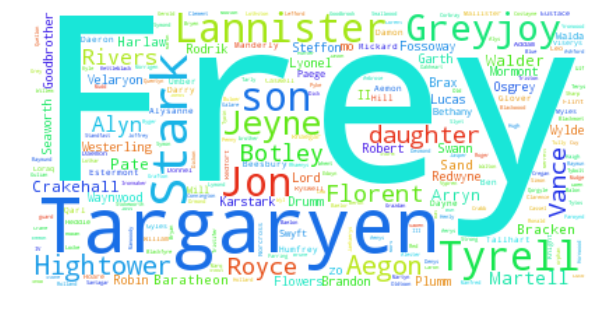

In [8]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,5))
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS.add("said"))
wc.generate(" ".join(data_predictions['name'].tolist()))
plt.imshow(wc)
plt.axis("off")
plt.figure()

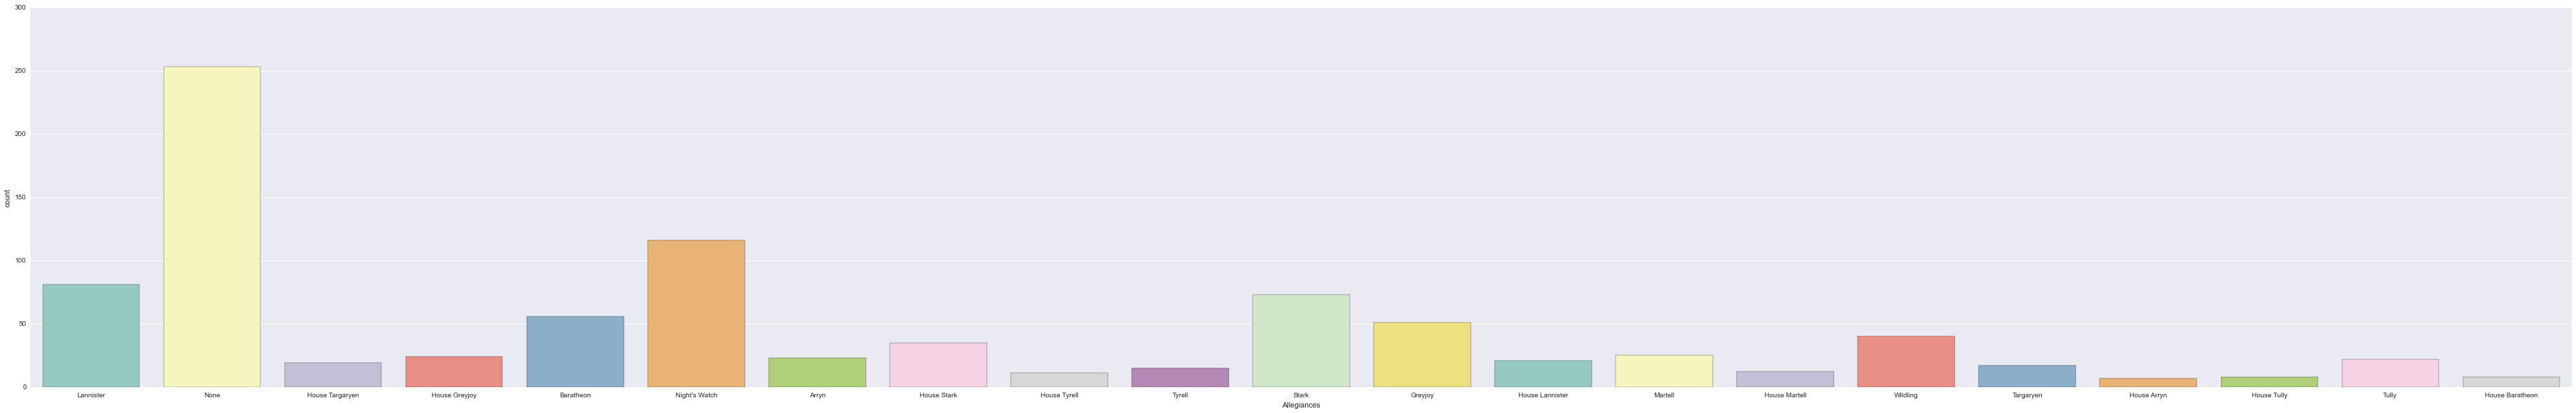

In [9]:
df = pd.Series(data_predictions['title'].fillna("Na")).count()
plt.figure(figsize=(67,10))
sns.countplot(x="Allegiances", data=data_deaths, palette="Set3")

### In which book was more deaths?

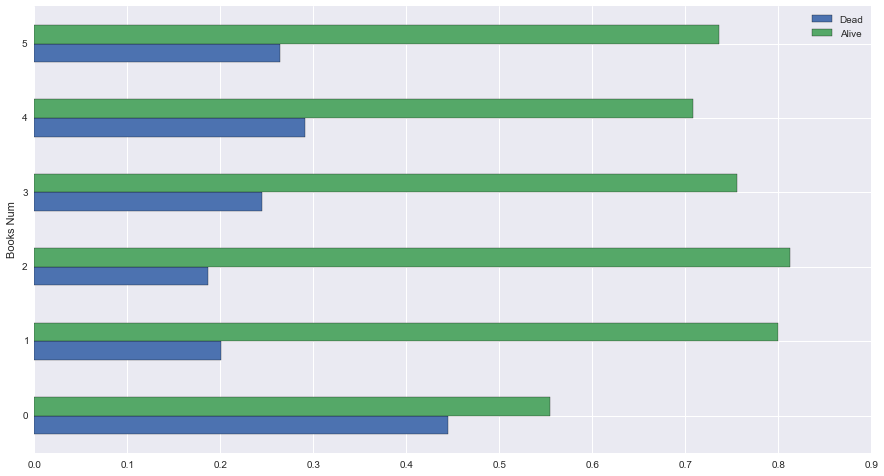

In [10]:
data_predictions.loc[:, "books_num"] = data_predictions[[x for x in data_predictions.columns if x.startswith("book")]].sum(axis = 1)
data = data_predictions.groupby(["books_num", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(figsize = (15, 8))
p.legend(["Dead", "Alive"])
p.set_ylabel("Books Num")

### Army

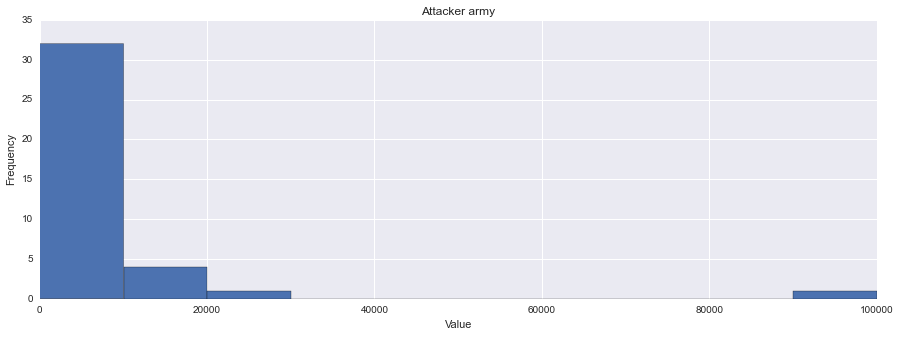

In [11]:
import matplotlib.pyplot as plt
from numpy.random import normal
plt.figure(figsize=(15,5))
plt.hist(data_battles["attacker_size"].fillna(data_battles["attacker_size"].mean()))
plt.title("Attacker army")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

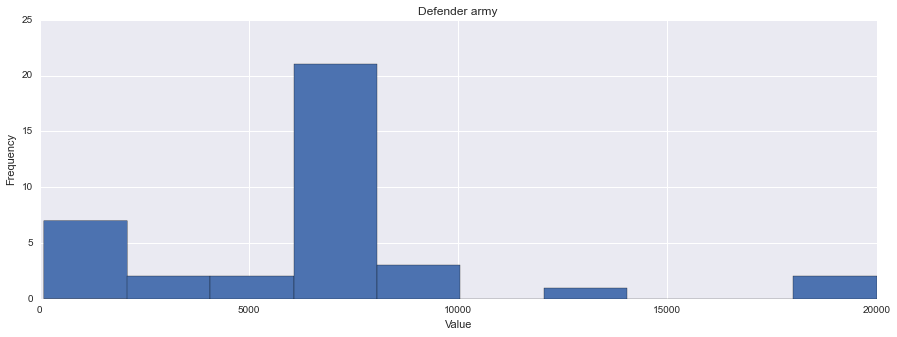

In [12]:
import matplotlib.pyplot as plt
from numpy.random import normal
plt.figure(figsize=(15,5))
plt.hist(data_battles["defender_size"].fillna(data_battles["defender_size"].mean()))
plt.title("Defender army")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### Married and popularity

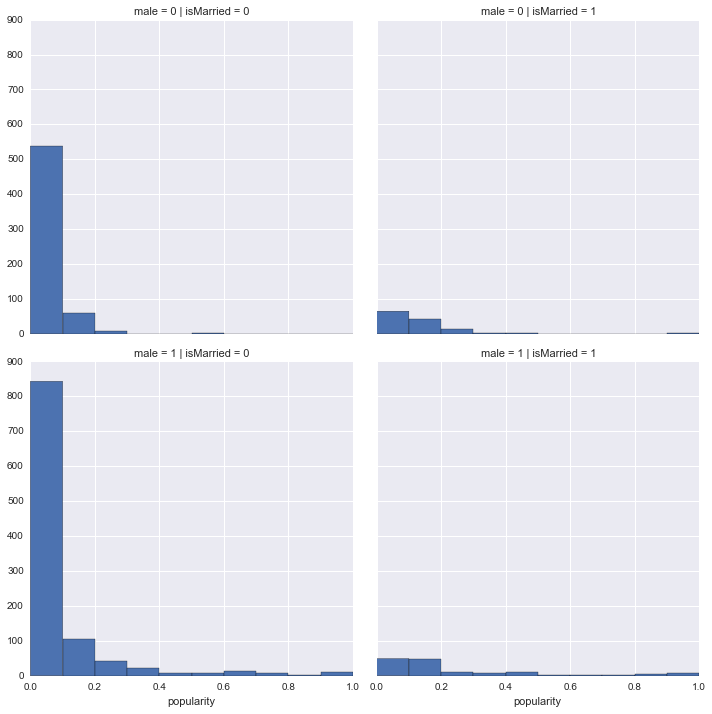

In [13]:
import seaborn as sns
g = sns.FacetGrid(data_predictions, row="male", col="isMarried", size=5)
g = g.map(plt.hist, "popularity")